# Principal Component Analysis (PCA)

**Which features are the most predictive of another?** One great way to answer this question is through *Principal Component Analysis* (PCA). PCA is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space. PCA achieves this by identifying the directions (principal components) in which the data varies the most, which helps maximize the ratio of dimensions (features) removed to variance reduction.

---

## PCA: The Algorithm

1. **Standardize the Data**:
   - Center the data by subtracting the mean and, optionally, scale it to unit variance.

2. **Compute the Covariance Matrix**:
   - The covariance matrix represents the relationships between features in the data.
   - For a dataset $A$ with $n$ samples and $p$ features, the covariance matrix is:
     $$
     \Sigma = \frac{1}{n-1} A^\top X
     $$

3. **Perform Eigenvalue Decomposition or Singular Value Decomposition**:
   - PCA involves finding the principal axes (principal components) of the data, which can be computed using either **Eigenvalue Decomposition** or **Singular Value Decomposition (SVD)**.
     - Note that not every matrix has an *Eigenvalue Decomposition*, but since $\Sigma$ is defined to be diagonizable, it always has one.

---

## Mathematical Details

![SVD Diagram](svd_diagram.png)

(Image credit to Gowtham Sivaraman on ResearchGate)

**Singular Value Decomposition (SVD)**
   - SVD is an alternative approach that directly decomposes the original data matrix $A$:
     $$
     A = U \Sigma V^\top
     $$
     - $U$: Left singular vectors (directions of data points in the reduced space).
     - $\Sigma$: Singular values (related to the eigenvalues of the covariance matrix).
     - $V$: Right singular vectors (principal components).

   - The principal components are the columns of $V$, and the singular values in $\Sigma$ are used to compute the explained variance.

---

## Dimensionality Reduction
1. Select the top $k$ eigenvectors (principal components) corresponding to the largest eigenvalues. *Our code will order the components by how predictive they tend to be*.
2. Transform the data into the new space:
   $$
   A_{\text{reduced}} = A V_k
   $$
   ($V_k$ contains the top $k$ principal components)

---

## The Good:
- Reduces dimensionality while preserving maximum variance.
- Removes correlation between features, making them orthogonal.

---

## The Bad:
- Assumes linear relationships in the data.
- Sensitive to outliers

## Load The Dataset

We will be using the wine dataset from UCI. We also use this dataset for K-Means Clustering. First, we will put it in a dataframe

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('wine.csv')

# Display the first few rows to understand the structure
df.head()



,Wine,Alcohol,Malic,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid-phenols,Proanth,Color,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Implement PCA Analysis

We will use the PCA library from sklearn. With PCA, we need to scale our data to make it work, so we will also import a scaler.

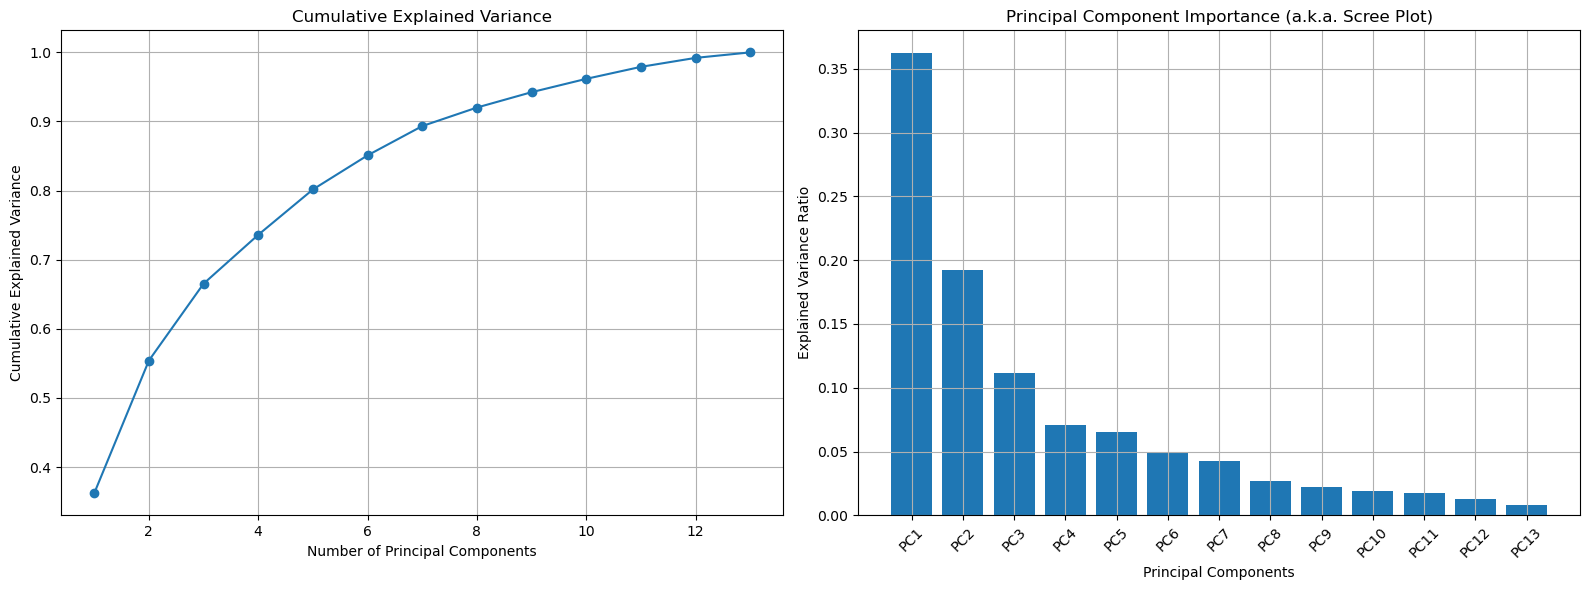

Explained Variance Ratios:
PC 1: 0.3620%
PC 2: 0.1921%
PC 3: 0.1112%
PC 4: 0.0707%
PC 5: 0.0656%
PC 6: 0.0494%
PC 7: 0.0424%
PC 8: 0.0268%
PC 9: 0.0222%
PC 10: 0.0193%
PC 11: 0.0174%
PC 12: 0.0130%
PC 13: 0.0080%


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the wine dataset (assuming it's in the same directory as 'wine.csv')
df = pd.read_csv('wine.csv')

# Separate features and target
features = df.drop(columns=['Wine'])  # Assuming 'Wine' is the target column
target = df['Wine']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df['Wine'] = target

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance and bar chart of each principal component side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cumulative explained variance plot
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
axes[0].set_title('Cumulative Explained Variance')
axes[0].set_xlabel('Number of Principal Components')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].grid()

# Bar chart of each principal component and its relative importance
axes[1].bar(x=[f'PC{i+1}' for i in range(len(explained_variance))], height=explained_variance)
axes[1].set_title('Principal Component Importance (a.k.a. Scree Plot)')
axes[1].set_xlabel('Principal Components')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_xticks(range(len(explained_variance)))
axes[1].set_xticklabels([f'PC{i+1}' for i in range(len(explained_variance))], rotation=45)
axes[1].grid()

plt.tight_layout()
plt.show()

# Create a key for each principal component including the names of the original features
pc_keys = {}
components = pca.components_
for i, component in enumerate(components):
    feature_contributions = sorted(zip(features.columns, component), key=lambda x: abs(x[1]), reverse=True)
    feature_names = ', '.join([f'{name} ({contrib:.2f})' for name, contrib in feature_contributions[:3]])  # Top 3 features
    pc_keys[f'PC{i+1}'] = f'Principal Component {i+1}: {feature_names}'

# Display the key
pc_keys

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print("Explained Variance Ratios:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC {i+1}: {variance:.4f}%")


According to our analysis, **the first two Principal Components are responsible for over 50% of the variance.** We can project the data on the first two principal components to demonstrate how well they separate the data.

## Projection on PC1 vs PC2

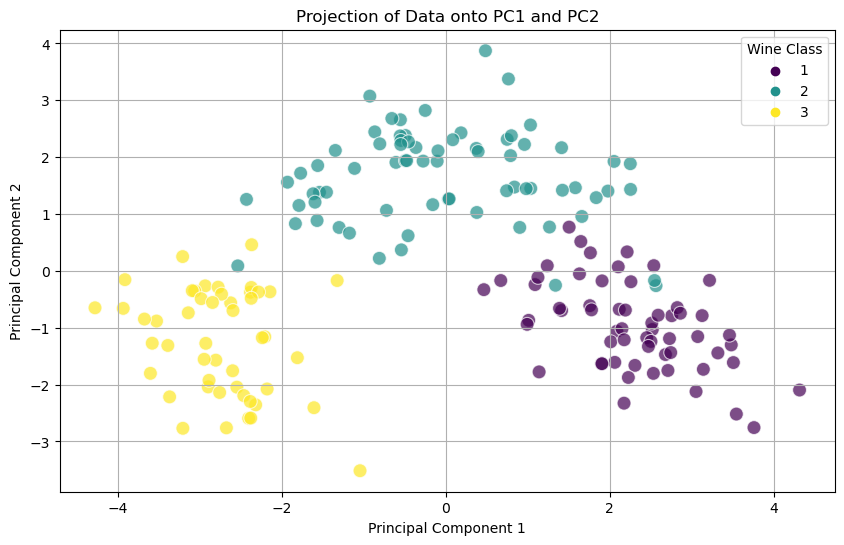

In [18]:
# Project the data onto the first two principal components
pc1_pc2_df = pca_df[['PC1', 'PC2', 'Wine']]

# Plot the projection
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pc1_pc2_df, x='PC1', y='PC2', hue='Wine', palette='viridis', s=100, alpha=0.7)
plt.title('Projection of Data onto PC1 and PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class')
plt.grid(True)
plt.show()

## Interpretation

Since the Principal Components are ordered heiarchially by how well they separate the classes, graphing the projection onto PC2 vs PC3 will result in more variance per class, same for PC3 vs. PC4, etc. We will plot this to demonstrate:

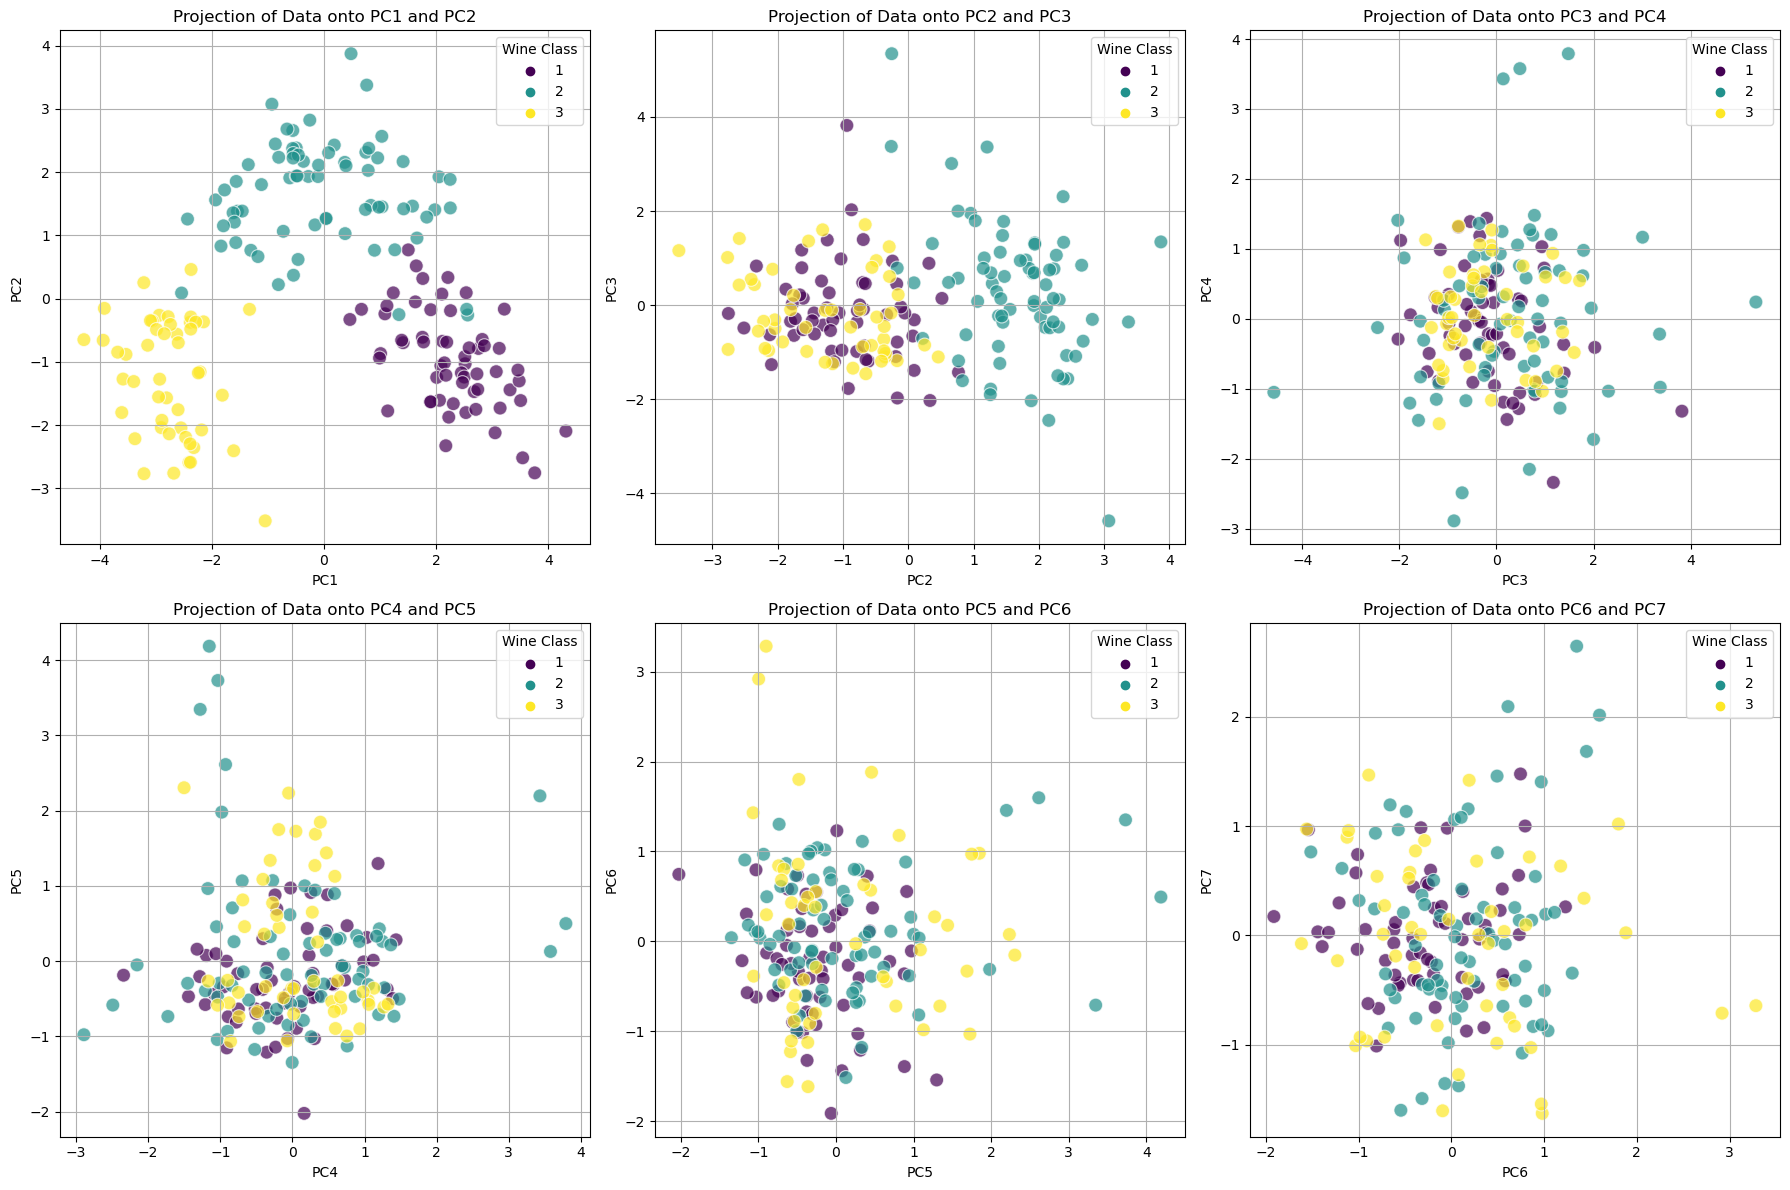

In [19]:
# Create a 2x3 grid of plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# List of principal components to plot
pcs = [(f'PC{i}', f'PC{i+1}') for i in range(1, 7)]

# Plot each pair of principal components
for ax, (pc_x, pc_y) in zip(axes.flatten(), pcs):
    sns.scatterplot(data=pca_df, x=pc_x, y=pc_y, hue='Wine', palette='viridis', s=100, alpha=0.7, ax=ax)
    ax.set_title(f'Projection of Data onto {pc_x} and {pc_y}')
    ax.set_xlabel(pc_x)
    ax.set_ylabel(pc_y)
    ax.legend(title='Wine Class')
    ax.grid(True)

plt.tight_layout()
plt.show()

**As predicted, the projections become increasingly useless.**

### In Conclusion

In performing the PCA, we mapped our wine data into a new coordinate system, with a lower dimensionality. Mapping it to two dimensions, we find that the maximum explained variance ratios we can retain is around 55.41% (Using the top two Principal Components). This is super powerful, considering there are 13 features total. We can implement K-Means Clustering on these first two Principal Components, and we will get a better separation than we did before in `k_means_clustering.ipynb` with the features 'Alcohol' vs. 'Flavanoids'.

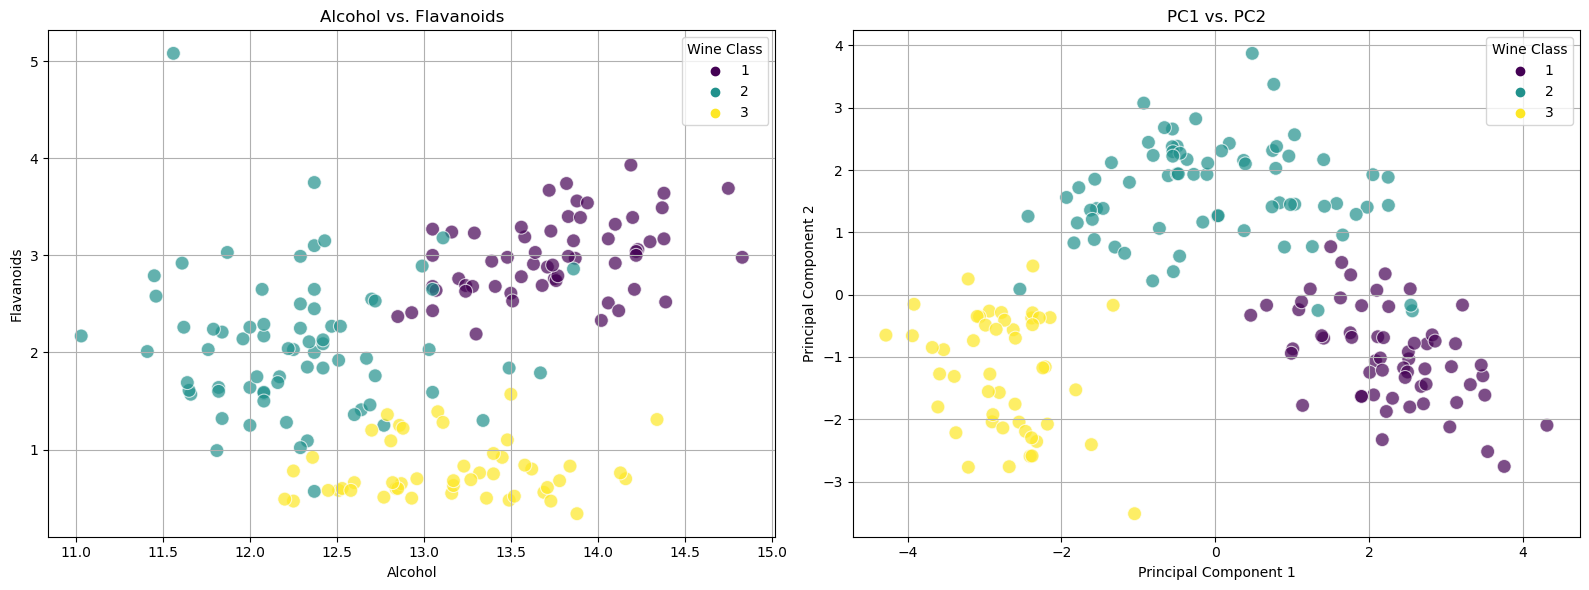

In [23]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Alcohol vs. Flavanoids on the left
sns.scatterplot(data=df, x='Alcohol', y='Flavanoids', hue='Wine', palette='viridis', s=100, alpha=0.7, ax=axes[0])
axes[0].set_title('Alcohol vs. Flavanoids')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Flavanoids')
axes[0].legend(title='Wine Class')
axes[0].grid(True)

# Plot PC1 vs. PC2 on the right
sns.scatterplot(data=pc1_pc2_df, x='PC1', y='PC2', hue='Wine', palette='viridis', s=100, alpha=0.7, ax=axes[1])
axes[1].set_title('PC1 vs. PC2')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(title='Wine Class')
axes[1].grid(True)

plt.tight_layout()
plt.show()